In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn import metrics
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import pandas as pd
import numpy as np
import os

In [ ]:
# membaca dataset dari file CSV
dataset = pd.read_csv('dataset_ann.csv')

In [ ]:
#label di kolom riwayat_alergi
#alergi 0 = bulu hewan, 1 = debu/tungau, 2 = makanan, 3 = obat, 4 = serbuk sari, 5 = suhu udara (dingin/panas)
#jumlah kolom sebanyak 19 kolom
dataset

,kulit_gatal,ruam_atau_kulit_memerah,bengkak_di_wajah,bengkak_di_bibir,gatal_di_mulut,kesemutan_atau_kebas_di_mulut,gatal_di_daerah_mata,bengkak_di_daerah_mata,mata_memerah,bersin,hidung_tersumbat,batuk,sesak_napas,pilek,sakit_perut,mual,muntah,diare,kambuh_di_musim_tertentu,riwayat_alergi
0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,5
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,1,1,1,0,0,0,1,0,0,1,1,1,0,1,0,0,0,0,1,5
3,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1
4,1,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1,1,1,0,2
683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
684,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0
685,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,2


In [ ]:
dataset.dtypes

kulit_gatal                      int64
ruam_atau_kulit_memerah          int64
bengkak_di_wajah                 int64
bengkak_di_bibir                 int64
gatal_di_mulut                   int64
kesemutan_atau_kebas_di_mulut    int64
gatal_di_daerah_mata             int64
bengkak_di_daerah_mata           int64
mata_memerah                     int64
bersin                           int64
hidung_tersumbat                 int64
batuk                            int64
sesak_napas                      int64
pilek                            int64
sakit_perut                      int64
mual                             int64
muntah                           int64
diare                            int64
kambuh_di_musim_tertentu         int64
riwayat_alergi                   int64
dtype: object

In [ ]:
# Memisahkan fitur dan label
# gejala = dataset.iloc[:, :-1].values
# alergi = dataset.iloc[:, -1].values

gejala = dataset.drop('riwayat_alergi',axis=1)
alergi = dataset['riwayat_alergi']

In [ ]:
gejala.sum()

kulit_gatal                      539
ruam_atau_kulit_memerah          521
bengkak_di_wajah                 231
bengkak_di_bibir                 188
gatal_di_mulut                   226
kesemutan_atau_kebas_di_mulut    126
gatal_di_daerah_mata             335
bengkak_di_daerah_mata           221
mata_memerah                     324
bersin                           452
hidung_tersumbat                 426
batuk                            432
sesak_napas                      408
pilek                            357
sakit_perut                      173
mual                             197
muntah                           137
diare                             83
kambuh_di_musim_tertentu         240
dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(gejala, alergi, test_size=0.1, random_state=16, shuffle=True)

In [ ]:
# Membangun model
"""
Ningkatin Akuarasi
nambahin layer,
neuron model
function activation bisa diganti relu, sigmoid, leaky relu (coba cek referensi function activatio)

""" 
model = Sequential()
model.add(Dense(160, input_dim=19, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [ ]:
# Membuat kompolasi model
"""
Mengatur optimizer, learning rate
referensi optimizer 
https://www.google.com/search?q=list+optimizer+ann&tbm=isch&ved=2ahUKEwiE_MX2oZj_AhUmgmMGHQD8AOcQ2-cCegQIABAA&oq=list+optimizer+ann&gs_lcp=CgNpbWcQAzoECCMQJ1DcEliXGmDwG2gAcAB4AIABtAGIAZ8HkgEDMC42mAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=smpzZITbG6aEjuMPgPiDuA4&bih=569&biw=1366#imgrc=kZ03liYln8Me7M&imgdii=yK-C7934uBwupM
"""
OPT    = tf.keras.optimizers.Adamax(learning_rate=0.002)
model.compile(optimizer=OPT,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
# Melatih model
history = model.fit(x_train, y_train, epochs=100, batch_size=16, validation_data=(x_test, y_test))

Epoch 1/100
39/39 [==============================] - 1s 10ms/step - loss: 1.6708 - accuracy: 0.2864 - val_loss: 1.5559 - val_accuracy: 0.2754
Epoch 2/100
39/39 [==============================] - 0s 4ms/step - loss: 1.4222 - accuracy: 0.4644 - val_loss: 1.2873 - val_accuracy: 0.5942
Epoch 3/100
39/39 [==============================] - 0s 3ms/step - loss: 1.1597 - accuracy: 0.5874 - val_loss: 1.0755 - val_accuracy: 0.6812
Epoch 4/100
39/39 [==============================] - 0s 3ms/step - loss: 0.9735 - accuracy: 0.6505 - val_loss: 0.9044 - val_accuracy: 0.6522
Epoch 5/100
39/39 [==============================] - 0s 4ms/step - loss: 0.8492 - accuracy: 0.6780 - val_loss: 0.8269 - val_accuracy: 0.7101
Epoch 6/100
39/39 [==============================] - 0s 4ms/step - loss: 0.7715 - accuracy: 0.7136 - val_loss: 0.7584 - val_accuracy: 0.7391
Epoch 7/100
39/39 [==============================] - 0s 3ms/step - loss: 0.7161 - accuracy: 0.7411 - val_loss: 0.7121 - val_accuracy: 0.6957
Epoch 8/100


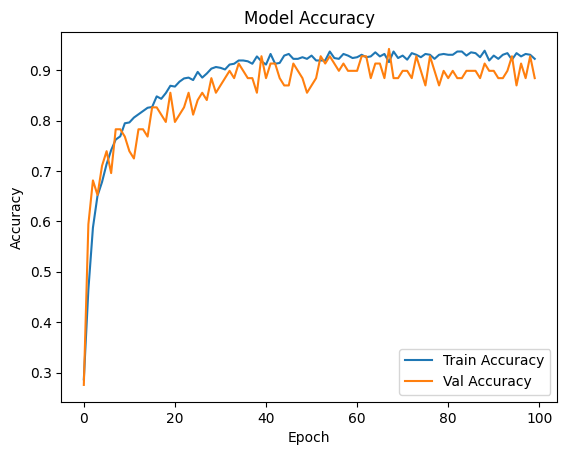

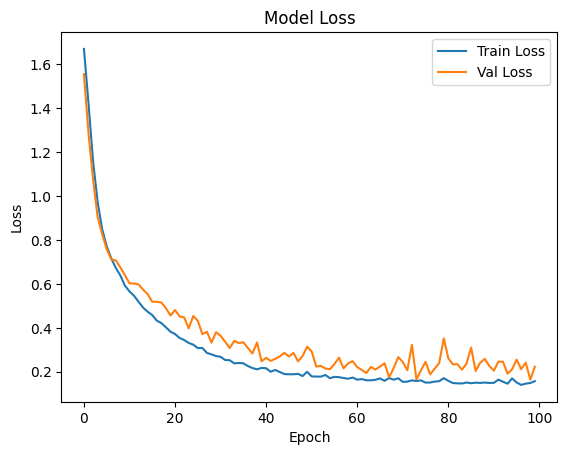

In [ ]:
# Membuat DataFrame dari history
history_df = pd.DataFrame(history.history)

# Membuat DataFrame terpisah untuk akurasi dan loss
accuracy_df = history_df[['accuracy', 'val_accuracy']]
loss_df = history_df[['loss', 'val_loss']]

# Plot grafik akurasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Val Accuracy'])
plt.show()

# Plot grafik loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Val Loss'])
plt.show()

In [ ]:
# Melakukan prediksi dengan gejala baru
new_gejala = x_test
predictions = model.predict(new_gejala)
predicted_label = tf.argmax(predictions, axis=1)

print("Hasil prediksi:", predicted_label.numpy())

3/3 [==============================] - 0s 3ms/step
Hasil prediksi: [0 1 2 1 1 3 0 1 3 1 3 3 1 5 1 2 2 2 1 4 1 5 0 0 0 2 2 3 3 5 5 5 2 0 5 1 3
 4 5 2 3 1 3 2 4 1 1 0 1 1 0 2 4 2 5 4 3 3 3 2 5 1 2 3 0 3 2 5 0]


In [ ]:
actual = np.array(y_test)

In [ ]:
cm = confusion_matrix(actual, predicted_label.numpy()) 
cm

array([[ 9,  2,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0],
       [ 0,  0, 13,  0,  0,  0],
       [ 0,  0,  1, 14,  0,  1],
       [ 1,  0,  0,  0,  5,  1],
       [ 0,  2,  0,  0,  0,  8]])

In [ ]:
from sklearn.metrics import balanced_accuracy_score
result_prediction = 100*balanced_accuracy_score(actual, predicted_label.numpy())
print(f"AKURASI TERHADAP DATA TEST DENGAN PERSENTASE TINGKAT PREDIKSI YANG BENAR ADALAH {result_prediction}%")

AKURASI TERHADAP DATA TEST DENGAN PERSENTASE TINGKAT PREDIKSI YANG BENAR ADALAH 86.79112554112555%


In [ ]:
model.save('model.h5')

In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_keras_model(tf.keras.models.load_model('model.h5'))

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'alergy_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [ ]:
try:
  files.download('alergy_model.tflite')
except:
  pass

**Testing**
checking for tflite file

In [ ]:
#Check Input Tensor Shape
tflite_model_path = "alergy_model.tflite"

In [ ]:
interpreter = tf.lite.Interpreter(model_path = tflite_model_path)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [ 1 19]
Input Type: <class 'numpy.float32'>
Output Shape: [1 6]
Output Type: <class 'numpy.float32'>


In [ ]:
# Membuat interpreter TensorFlow Lite
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)

# Memuat model TFLite
interpreter.allocate_tensors()

In [ ]:
input_details[0]['shape']
output_details[0]['shape']

array([1, 6], dtype=int32)

In [ ]:
# Membuat array input
input_data = np.array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]], dtype=np.float32)

# Membuat interpreter TensorFlow Lite
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)

# Memuat model TFLite
interpreter.allocate_tensors()

# Mendapatkan input dan output tensor dari interpreter
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Menetapkan data input ke tensor input
interpreter.set_tensor(input_details[0]['index'], input_data)

# Menjalankan inferensi
interpreter.invoke()

# Mendapatkan output dari tensor output
output_data = interpreter.get_tensor(output_details[0]['index'])

# Melakukan sesuatu dengan output
print(output_data)

[[1.1387873e-03 3.8900662e-03 6.6179357e-04 3.2065087e-04 1.2805322e-04
  9.9386072e-01]]
